'telecom.csv'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df= pd.read_csv("telecom.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7853-GVUDZ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.15,20.15,Yes
1,6893-ODYYE,Male,0,No,No,50,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,No,One year,Yes,Credit card (automatic),90.10,4549.45,No
2,0486-HECZI,Male,0,Yes,No,55,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,96.75,5238.9,Yes
3,8972-HJWNV,Female,1,Yes,No,7,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.55,646.85,Yes
4,9317-WZPGV,Female,1,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),79.75,159.4,Yes
5,0960-HUWBM,Male,0,Yes,Yes,65,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),104.10,6700.05,No
6,1385-TQOZW,Female,0,No,No,9,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.45,147.55,No
7,3005-NFMTA,Male,1,No,No,55,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.80,5617.75,Yes
8,2817-LVCPP,Female,0,No,No,50,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.40,1023.95,No
9,3190-XFANI,Male,0,No,Yes,49,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),100.60,5069.65,Yes


In [3]:
# check the number of unique values for each feauture
i=0
cols=list(df.columns.values)
for i in range(len(df.columns)):
         print( cols[i]+':'+ str(len(df.iloc[:,i].unique())))

customerID:6000
gender:2
SeniorCitizen:2
Partner:2
Dependents:2
tenure:73
PhoneService:2
MultipleLines:3
InternetService:3
OnlineSecurity:3
OnlineBackup:3
DeviceProtection:3
TechSupport:3
StreamingTV:3
StreamingMovies:3
Contract:3
PaperlessBilling:2
PaymentMethod:4
MonthlyCharges:1519
TotalCharges:5622
Churn:2


In [4]:
##Drop some columns
#•customer ID >> we see that customer ID is unique value and can be ignored in our models, because no  information give regarding 
#dependance of dependant variable("Chure") and features
#•Total Charges >> Monthly charges and total Chareges are highly correleted , and one of them should be dropped, we decieded to drop
df=df.drop(['customerID'], axis=1)

In [5]:
 df['TotalCharges']=df['TotalCharges'].apply(pd.to_numeric, downcast='float', errors='coerce')

In [6]:

 df['TotalCharges'].dtypes

dtype('float64')

In [7]:
DF_C = pd.DataFrame(df,columns=['tenure','TotalCharges','MonthlyCharges'])

corrMatrix = DF_C.corr()

corrMatrix 


,tenure,TotalCharges,MonthlyCharges
tenure,1.000000,0.826919,0.246641
TotalCharges,0.826919,1.000000,0.648697
MonthlyCharges,0.246641,0.648697,1.000000


In [8]:
#we decieded to drop TotalCharges, as it highly correlated with  tenue too
df=df.drop(['TotalCharges'], axis=1)

In [9]:
## identify missing value
i=0
cols=list(df.columns.values)
for i in range(len(df.columns)):
         print( cols[i]+':'+ str(list(df.iloc[:,i].isnull()).count(True)))

gender:0
SeniorCitizen:0
Partner:0
Dependents:0
tenure:0
PhoneService:0
MultipleLines:0
InternetService:0
OnlineSecurity:0
OnlineBackup:0
DeviceProtection:0
TechSupport:0
StreamingTV:0
StreamingMovies:0
Contract:0
PaperlessBilling:0
PaymentMethod:0
MonthlyCharges:0
Churn:0


In [10]:
# we have no missing values, so we can continue with this data set 
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.15,Yes
1,Male,0,No,No,50,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),90.10,No
2,Male,0,Yes,No,55,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,96.75,Yes
3,Female,1,Yes,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.55,Yes
4,Female,1,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),79.75,Yes


In [11]:
#replace values "YES" and "No" accordingly with "1" and "0"
df_D=df.replace(to_replace =["Yes", "No"],  
                            value =["1","0"]) 
df_D

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,1,1,1,1,0,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Credit card (automatic),20.15,1
1,Male,0,0,0,50,1,0,Fiber optic,1,1,1,1,0,0,One year,1,Credit card (automatic),90.10,0
2,Male,0,1,0,55,1,1,Fiber optic,1,1,0,0,1,0,Month-to-month,1,Electronic check,96.75,1
3,Female,1,1,0,7,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,84.55,1
4,Female,1,0,0,2,1,0,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Bank transfer (automatic),79.75,1
5,Male,0,1,1,65,1,1,Fiber optic,0,0,1,1,1,1,Two year,1,Bank transfer (automatic),104.10,0
6,Female,0,0,0,9,1,0,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Credit card (automatic),20.45,0
7,Male,1,0,0,55,1,1,Fiber optic,1,0,0,0,1,1,Month-to-month,1,Electronic check,98.80,1
8,Female,0,0,0,50,1,0,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),19.40,0
9,Male,0,0,1,49,1,1,Fiber optic,0,0,0,1,1,1,One year,1,Bank transfer (automatic),100.60,1


In [12]:
## min value of tenure is 0 and max is 72
# we can group data on 7 groups: '0-12 months','13-24 m','25-48 m','49-60 m','60+ m'

In [13]:
df.tenure.describe()

count    6000.000000
mean       32.474500
std        24.580963
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

In [14]:
for i in range (len(df['tenure'])):
    if df['tenure'][i] >=0 and df['tenure'][i] <=12:
           df['tenure'][i] ='0-12 months'
    elif df['tenure'][i] >=13 and df['tenure'][i] <=24:
         df['tenure'][i] ='13-24 months'
    elif df['tenure'][i] >=25 and df['tenure'][i] <=48:
         df['tenure'][i] ='25-48 months'
    elif df['tenure'][i] >=49 and df['tenure'][i] <=60:
         df['tenure'][i] ='49-60 months'
    elif df['tenure'][i] >=61 :
         df['tenure'][i] ='60+ months'

C:\Users\pc\anaconda3.1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pc\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\pc\anaconda3.1\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __nam

In [15]:
df['tenure'].head(5)

0     0-12 months
1    49-60 months
2    49-60 months
3     0-12 months
4     0-12 months
Name: tenure, dtype: object

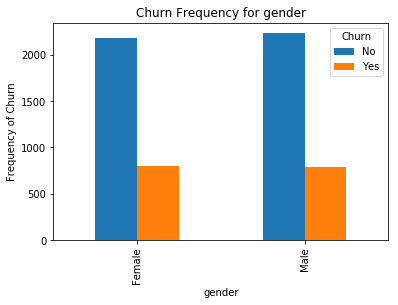

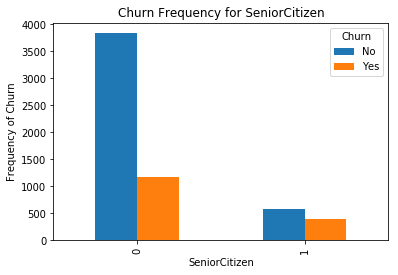

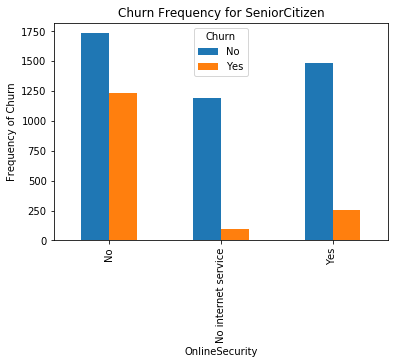

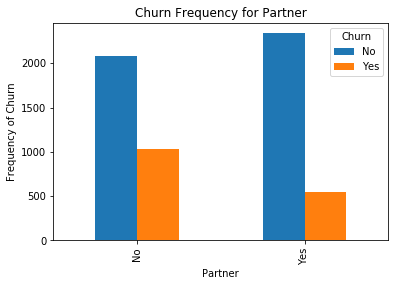

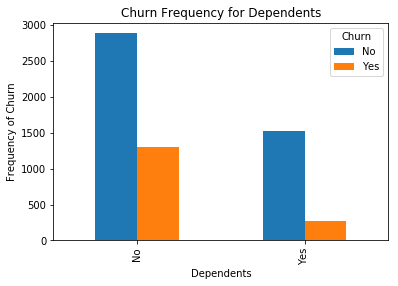

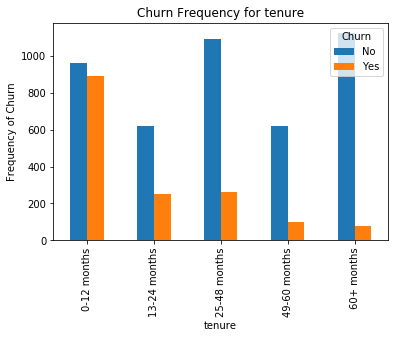

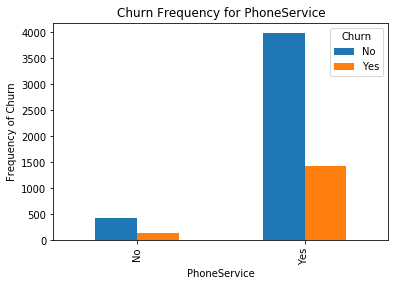

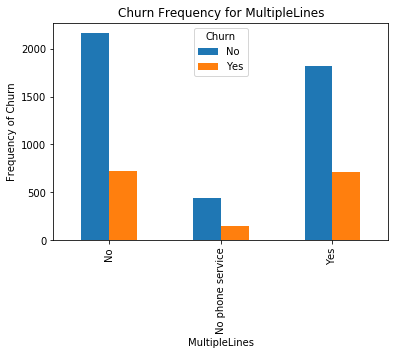

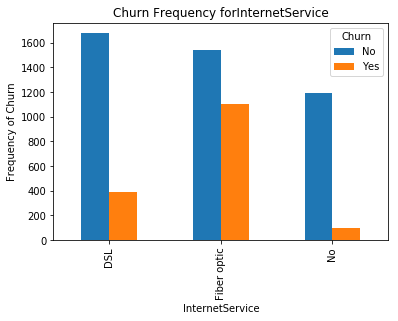

In [16]:
#Vizulization

# define the figure container and the two plot axes
fig = plt.figure(figsize=(20,5))

# add subplots to the figure (build a 1x2 grid and place chart in the first or second section)
ax1= fig.add_subplot(3,3,1)
ax2= fig.add_subplot(3,3,2)
ax3= fig.add_subplot(3,3,3)
ax4= fig.add_subplot(3,3,4)
ax5= fig.add_subplot(3,3,5)
ax6= fig.add_subplot(3,3,6)
ax7= fig.add_subplot(3,3,7)
ax8= fig.add_subplot(3,3,8)
ax9= fig.add_subplot(3,3,9)
##
%matplotlib inline
ax1=pd.crosstab(df.gender,df.Churn).plot(kind='bar')
plt.title('Churn Frequency for gender')
plt.xlabel('gender')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_fre_gender')
##2
ax2=pd.crosstab(df.SeniorCitizen,df.Churn).plot(kind='bar')
plt.title('Churn Frequency for SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_fre_SeniorCitizen')
##3
ax3=pd.crosstab(df.OnlineSecurity,df.Churn).plot(kind='bar')
plt.title('Churn Frequency for SeniorCitizen')
plt.xlabel('OnlineSecurity')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_fre_OnlineSecurity')
#4
ax4=pd.crosstab(df.Partner,df.Churn).plot(kind='bar')
plt.title('Churn Frequency for Partner')
plt.xlabel('Partner')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_fre_Partner')
#5
ax5=pd.crosstab(df.Dependents,df.Churn).plot(kind='bar')
plt.title('Churn Frequency for Dependents')
plt.xlabel('Dependents')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_fre_Dependents')
#6
ax6=pd.crosstab(df.tenure,df.Churn).plot(kind='bar')
plt.title('Churn Frequency for tenure')
plt.xlabel('tenure')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_fre_tenure')
#7
ax7=pd.crosstab(df.PhoneService,df.Churn).plot(kind='bar')
plt.title('Churn Frequency for PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_fre_PhoneService')
#8
ax8=pd.crosstab(df.MultipleLines,df.Churn).plot(kind='bar')
plt.title('Churn Frequency for MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_fre_MultipleLines')
#9
ax9=pd.crosstab(df.InternetService,df.Churn).plot(kind='bar')
plt.title('Churn Frequency forInternetService')
plt.xlabel('InternetService')
plt.ylabel('Frequency of Churn')
plt.savefig('Churn_fre_InternetService')

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,Yes,0-12 months,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.15,Yes
1,Male,0,No,No,49-60 months,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,No,No,One year,Yes,Credit card (automatic),90.10,No
2,Male,0,Yes,No,49-60 months,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,96.75,Yes
3,Female,1,Yes,No,0-12 months,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.55,Yes
4,Female,1,No,No,0-12 months,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),79.75,Yes


In [18]:
df_D=pd.get_dummies(df,columns=['gender','tenure','Partner','Dependents','PhoneService',
'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
'StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
df_D.head(5)

,SeniorCitizen,MonthlyCharges,Churn,gender_Female,gender_Male,tenure_0-12 months,tenure_13-24 months,tenure_25-48 months,tenure_49-60 months,tenure_60+ months,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,20.15,Yes,1,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,90.10,No,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
2,0,96.75,Yes,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,1,84.55,Yes,1,0,1,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
4,1,79.75,Yes,1,0,1,0,0,0,0,...,1,1,0,0,0,1,1,0,0,0


In [19]:
#Dependant variable
y=df_D['Churn']

In [20]:
X=df_D.drop(['Churn'],axis=1)

In [21]:
y=y.replace(to_replace =["Yes", "No"],  
                            value =["1","0"])

Split data into 2 parts, take the small one as the final test. You will be using for each model's final evaluation

In [25]:
X_m, X_t, y_m, y_t = train_test_split(X, y, test_size=1/6)
print (X_m.shape, y_m.shape)
print (X_t.shape, y_t.shape)

(5000, 48) (5000,)
(1000, 48) (1000,)


# Build 5 classification models

logistic regression, decision tree, random forest, knn, svm

#### tips
<br>
1. use cross validation
<br>
2. use same splits for all classifiers (to have correct comparison)
<br>
3. build a table to show statistics for all classifiers (at least - accuracy, precision and recall. Any more component would be a +)

In [84]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### choose the best model. Either retrain it or copy it in the cell below

#1.Logistic regression

In [85]:
kf = KFold(n_splits=10)
test_rmse = []
train_rmse = []

for train_index, test_index in kf.split(X_m):
    xTrain, xTest = X_m.iloc[train_index], X_m.iloc[test_index]    
    yTrain, yTest = y_m.iloc[train_index], y_m.iloc[test_index]
    #Logistic regression
    lm= LogisticRegression()
    model_1 = lm.fit(xTrain, yTrain)
    predictions = lm.predict(xTest)
    predictions_train = lm.predict(xTrain)
    
    test_rmse.append(np.sqrt(mean_squared_error(yTest, predictions)))
    train_rmse.append(np.sqrt(mean_squared_error(yTrain, predictions_train)))
    #KNN 
    knn = KNeighborsClassifier(n_neighbors=3)
    model_2 = knn.fit(xTrain, yTrain)
    y_knn=knn.predict(xTest)
    #SVM
    clf = svm.SVC(kernel='linear') # Linear Kernel
    model_3= clf.fit(xTrain, yTrain)
    y_clf = clf.predict(xTest)
    #Decision tree
    DT = DecisionTreeClassifier(max_leaf_nodes=6)
    model_4 = DT.fit(xTrain, yTrain)
    y_dt=DT.predict(xTest)
    #Rendom Forest
    rf = RandomForestClassifier(n_estimators=20, random_state=0) 
    model_5=rf.fit(xTrain, yTrain) 
    y_rf=rf.predict(xTest)

C:\Users\pc\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\pc\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [91]:
print('Logistic regression:',classification_report(yTest, predictions))
print('KNN:',classification_report(yTest, y_knn))
print('SVM:',classification_report(yTest, y_clf))
print('DecisionTree:',classification_report(yTest, y_dt))
print('RandomForest:',classification_report(yTest,y_rf))

Logistic regression:               precision    recall  f1-score   support

           0       0.85      0.91      0.88       444
           1       0.69      0.53      0.60       156

    accuracy                           0.81       600
   macro avg       0.77      0.72      0.74       600
weighted avg       0.81      0.81      0.81       600

KNN:               precision    recall  f1-score   support

           0       0.83      0.84      0.83       444
           1       0.52      0.49      0.51       156

    accuracy                           0.75       600
   macro avg       0.67      0.67      0.67       600
weighted avg       0.75      0.75      0.75       600

SVM:               precision    recall  f1-score   support

           0       0.83      0.91      0.87       444
           1       0.65      0.46      0.54       156

    accuracy                           0.80       600
   macro avg       0.74      0.69      0.70       600
weighted avg       0.78      0.80      0.78

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
# final_model = ...().fit(...) # example for retraining

In [89]:
kf = KFold(n_splits=10)
test_rmse = []
train_rmse = []

for train_index, test_index in kf.split(X):
    xTrain, xTest = X.iloc[train_index], X.iloc[test_index]    
    yTrain, yTest = y.iloc[train_index], y.iloc[test_index]
    #Logistic regression
    lm= LogisticRegression()
    model_1 = lm.fit(xTrain, yTrain)
    predictions = lm.predict(xTest)
    predictions_train = lm.predict(xTrain)
    
    test_rmse.append(np.sqrt(mean_squared_error(yTest, predictions)))
    train_rmse.append(np.sqrt(mean_squared_error(yTrain, predictions_train)))
    #KNN 
    knn = KNeighborsClassifier(n_neighbors=3)
    model_2 = knn.fit(xTrain, yTrain)
    y_knn=knn.predict(xTest)
    #SVM
    clf = svm.SVC(kernel='linear') # Linear Kernel
    model_3= clf.fit(xTrain, yTrain)
    y_clf = clf.predict(xTest)
    #Decision tree
    DT = DecisionTreeClassifier(max_leaf_nodes=6)
    model_4 = DT.fit(xTrain, yTrain)
    y_dt=DT.predict(xTest)
    #Rendom Forest
    rf = RandomForestRegressor() 
    model_5=rf.fit(xTrain, yTrain) 
    y_rf=rf.predict(xTest)

C:\Users\pc\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\pc\anaconda3.1\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regre

In [90]:
print('Logistic regression:',classification_report(yTest, predictions))
print('KNN:',classification_report(yTest, y_knn))
print('SVM:',classification_report(yTest, y_clf))
print('DecisionTree:',classification_report(yTest, y_dt))
print('RandomForest:',classification_report(yTest,y_rf))

Logistic regression:               precision    recall  f1-score   support

           0       0.85      0.91      0.88       444
           1       0.69      0.53      0.60       156

    accuracy                           0.81       600
   macro avg       0.77      0.72      0.74       600
weighted avg       0.81      0.81      0.81       600

KNN:               precision    recall  f1-score   support

           0       0.83      0.84      0.83       444
           1       0.52      0.49      0.51       156

    accuracy                           0.75       600
   macro avg       0.67      0.67      0.67       600
weighted avg       0.75      0.75      0.75       600

SVM:               precision    recall  f1-score   support

           0       0.83      0.91      0.87       444
           1       0.65      0.46      0.54       156

    accuracy                           0.80       600
   macro avg       0.74      0.69      0.70       600
weighted avg       0.78      0.80      0.78

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
I will choose Logistic regression model